# I. Importul bibliotecilor și încărcarea datelor

In [1]:
# Importarea bibliotecilor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Citirea setului de date games.csv
games_df=pd.read_csv("video_games_sales.csv")

In [3]:
# Afișarea primelor 5 observații
games_df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
 # Afișarea listei cu toate coloanele din DataFrame
print("Coloane:", games_df.columns.tolist())

Coloane: ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


# II. Analiza structurii setului de dat

Caracteristicile setului de date:


- Rank: Poziția jocului în clasament.
 
- Name: Numele jocului.
 
- Platform: Platforma pe care a fost lansat jocul.
 
- Year: Anul lansării jocului.
 
- Genre: Genul jocului.
 
- Publisher: Editorul jocului.
  
- NA_Sales: Vânzările în America de Nord.
 
- EU_Sales: Vânzările în Europa.
 
- JP_Sales: Vânzările în Japonia.
 
- Other_Sales: Vânzările în alte regiuni.
 
- Global_Sales: Vânzările globale totale.


In [5]:
# Dimensiunea DataFrame-ului
print("Dimensiune DataFrame:",games_df.shape)

Dimensiune DataFrame: (16598, 11)


In [6]:
print("===== Tipurile de date =====")
games_df.dtypes

===== Tipurile de date =====


rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [7]:
# Informații despre coloane, tipuri de date și valori lipsă
print("===== Rezumat DataFrame =====")
games_df.info()

===== Rezumat DataFrame =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
# Statistici descriptive pentru fiecare coloană numerică
print("===== Date statistice =====")
games_df.describe()

===== Date statistice =====


,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
print("===== Număr de valori unice per coloană =====")
games_df.nunique()   #numără valorile unice per coloană       

===== Număr de valori unice per coloană =====


rank            16598
name            11493
platform           31
year               39
genre              12
publisher         578
na_sales          409
eu_sales          305
jp_sales          244
other_sales       157
global_sales      623
dtype: int64

In [10]:
# Verificarea valorilor lipsă 
missing_values =games_df.isna().sum()
if missing_values.sum() > 0:
    print("Valori lipsă pe coloană:")
    print(missing_values[missing_values > 0])
else:
    print("Nu există valori lipsă în setul de date.")

Valori lipsă pe coloană:
year         271
publisher     58
dtype: int64


In [11]:
print("Rânduri dublicate:",games_df.duplicated().sum())

Rânduri dublicate: 0


#### Histogramă

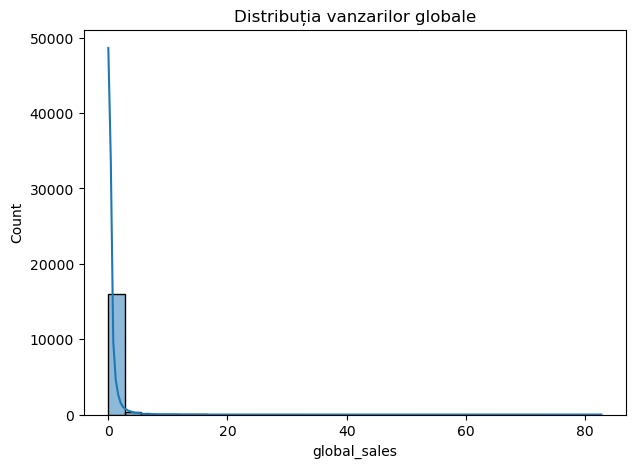

In [12]:
# Distribuția variabilei țintă (Global_Sales: Vânzările global sales.)
# Setearea dimensiunii figurii pentru grafic
plt.figure(figsize=(7,5))  

# Crearea unei histograme cu curba de densitate (KDE) pentru variabila țintă global sales
sns.histplot(games_df['global_sales'], kde=True, bins=30)  

# Adăugarea titlului pentru grafic
plt.title('Distribuția vanzarilor globale')  

# Afișare grafic
plt.show()  


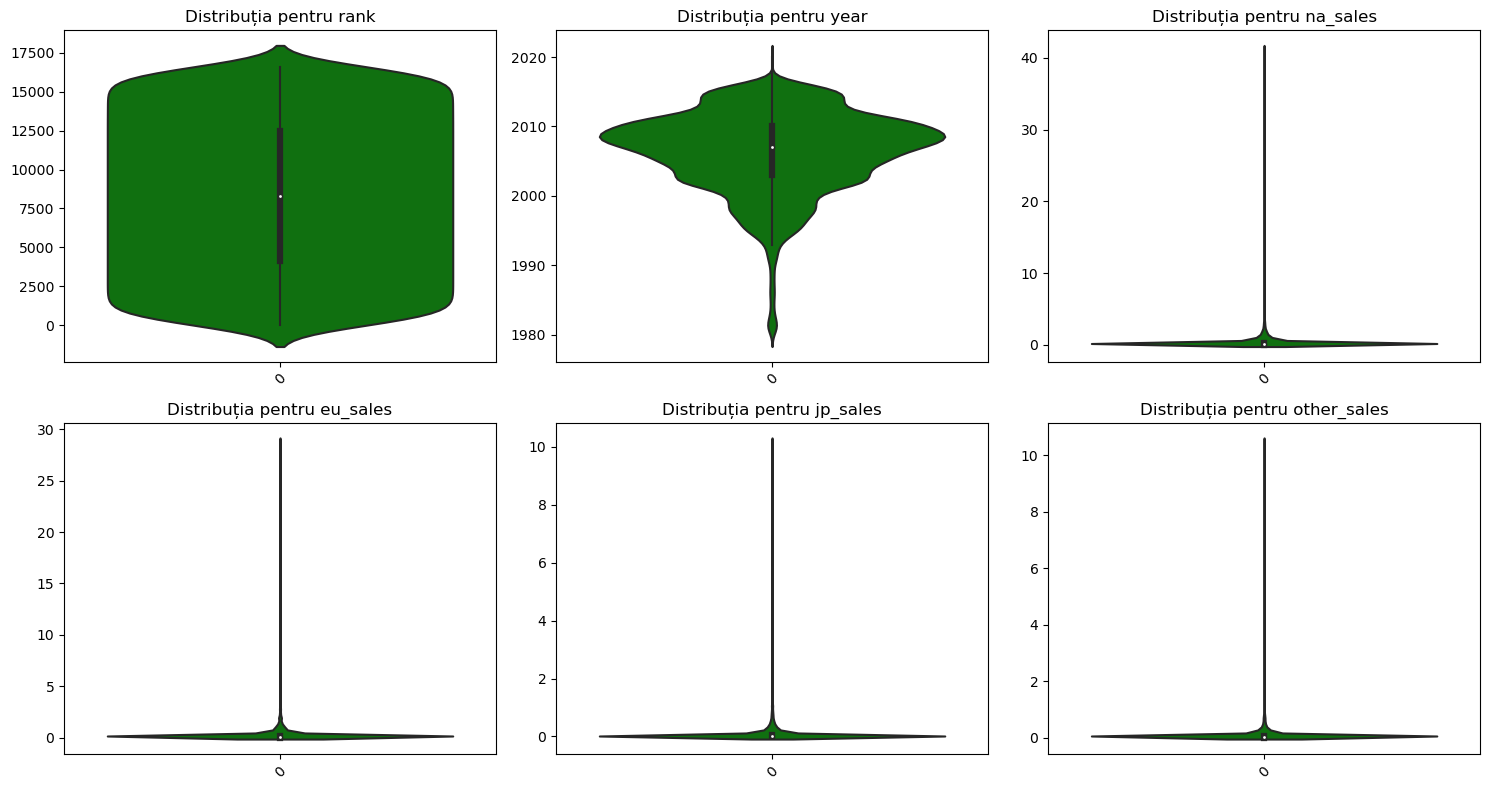

In [13]:
# Distribuția tuturor variabilelor

# Selectarea coloanelor numerice
games_df_plot=games_df.drop('global_sales', axis=1)
num_cols = games_df_plot.select_dtypes(include=[np.number]).columns

# Setare subgraficului
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

# Creare distplot pentru fiecare coloană numerică
for i, col in enumerate(num_cols):
    sns.violinplot(games_df_plot[col], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f"Distribuția pentru {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Ascunderea subploturilor goale
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# III. Curățarea datelor

In [14]:
print("===== Date lipsă ===== ") 
games_df.isna().sum()

===== Date lipsă ===== 


rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [15]:
# Eliminăm rândurile cu date lipsă
games_df = games_df.dropna()

In [16]:
# Verificăm că s-a efectuat corect eliminarea
print("===== Date curate ===== ") 
games_df.isna().sum()

===== Date curate ===== 


rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [17]:
# Calcularea Q1, Q3 și IQR pentru global_sales
Q1 = games_df["global_sales"].quantile(0.25)
Q3 = games_df["global_sales"].quantile(0.75)
IQR = Q3 - Q1

# Limitele pentru outlieri
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Limita inferioară:", lower_bound)
print("Limita superioară:", upper_bound)

# Eliminarea outlierilor 
games_df_og= games_df
games_df = games_df[(games_df["global_sales"] >= lower_bound) & (games_df["global_sales"] <= upper_bound)]
print("Dimensiune dataset original:", games_df_og.shape)
print("Dimensiune dataset fără outlieri:", games_df.shape)

# Verificarea valorilor pentru siguranță
print("Valori maxime global_sales după eliminare:", games_df["global_sales"].max())
print("Valori minime global_sales după eliminare:", games_df["global_sales"].min())

Limita inferioară: -0.5700000000000001
Limita superioară: 1.1099999999999999
Dimensiune dataset original: (16291, 11)
Dimensiune dataset fără outlieri: (14465, 11)
Valori maxime global_sales după eliminare: 1.1
Valori minime global_sales după eliminare: 0.01


In [18]:
# Determinăm coeficienții de corelație
games_df_copie =  games_df.select_dtypes(include=[np.number])
games_df_copie.corr()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,1.000000,0.161113,-0.715715,-0.595373,-0.266909,-0.573447,-0.880176
year,0.161113,1.000000,-0.114186,0.044343,-0.184455,0.099221,-0.118305
na_sales,-0.715715,-0.114186,1.000000,0.437125,-0.155428,0.472498,0.801765
eu_sales,-0.595373,0.044343,0.437125,1.000000,-0.111944,0.639528,0.715063
jp_sales,-0.266909,-0.184455,-0.155428,-0.111944,1.000000,-0.053897,0.275445
other_sales,-0.573447,0.099221,0.472498,0.639528,-0.053897,1.000000,0.670905
global_sales,-0.880176,-0.118305,0.801765,0.715063,0.275445,0.670905,1.000000


In [19]:
corr_games = games_df_copie.corr().round(2)
print(corr_games)

              rank  year  na_sales  eu_sales  jp_sales  other_sales  \
rank          1.00  0.16     -0.72     -0.60     -0.27        -0.57   
year          0.16  1.00     -0.11      0.04     -0.18         0.10   
na_sales     -0.72 -0.11      1.00      0.44     -0.16         0.47   
eu_sales     -0.60  0.04      0.44      1.00     -0.11         0.64   
jp_sales     -0.27 -0.18     -0.16     -0.11      1.00        -0.05   
other_sales  -0.57  0.10      0.47      0.64     -0.05         1.00   
global_sales -0.88 -0.12      0.80      0.72      0.28         0.67   

              global_sales  
rank                 -0.88  
year                 -0.12  
na_sales              0.80  
eu_sales              0.72  
jp_sales              0.28  
other_sales           0.67  
global_sales          1.00  


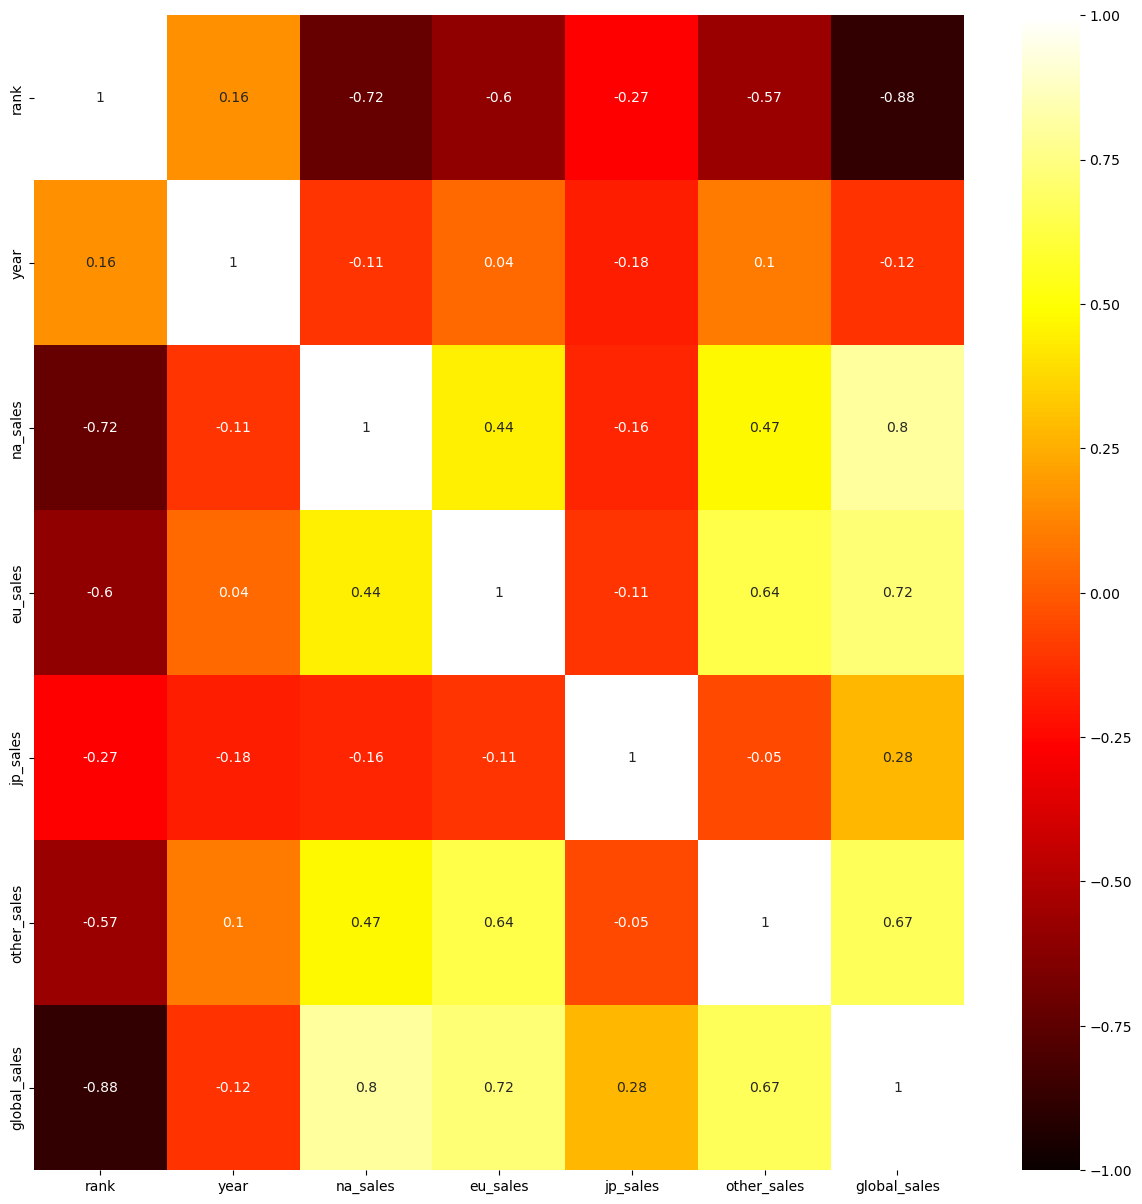

In [20]:
# Hartă de corelare
# Crearea figurii cu dimensiunea 15x15 inch
plt.figure(figsize=(15,15))

# Crearea unui heatmap pentru matricea de corelații 'corr_boston'
sns.heatmap(
    data=corr_games,   # datele care vor fi afișate în heatmap
    vmin=-1,            # valoarea minimă a culorilor (pentru scală)
    vmax=1,             # valoarea maximă a culorilor (pentru scală)
    center=0,           # centrul culorilor la 0 (pozitive vs negative)
    annot=True,         # afișează valorile numerice în celule
    cmap='hot'         # paleta de culori folosită
)

# Afișarea graficului
plt.show()


> Se observă că variabila **global_sales** este **puternic corelată pozitiv cu na_sales (0.80)** și **slab cu jp_sales (0.28)**, ceea ce arată că America de Nord influenteaza cel mai mult vanzarile de jocuri video, iar Japonia influenteaza cel mai putin. Pentru **eu_sales**  si **other_sales** au o corelatie mai puternica fata de **jp_sales**. Observam ca **rank** nu ne ajuta, iar **year** 


#### Observație:
Analizând matricea de corelație, se observă că unele variabile sunt foarte corelate între ele (|r| > 0.7), ceea ce poate provoca **multicolinearitate** în modelul de regresie.
Pentru a evita redundanța și a crește stabilitatea coeficienților, se păstrează doar o variabilă din fiecare pereche puternic corelată și se elimină cealaltă.
* De exemplu, rank și na_sales au o corelație de 0.72; păstrăm na_sales și eliminăm rank. 

In [21]:
cols = ['rank']
games_df_nemodificat=games_df_copie
games_df = games_df_copie.drop(columns=cols)

# Verificăm dimensiunea noului dataframe
print("Dimensiunea inițială:", games_df_nemodificat.shape)
print("Dimensiunea după eliminare:", games_df.shape)

# Verificăm coloanele rămase
print("Coloane rămase:", games_df.columns.tolist())


Dimensiunea inițială: (14465, 7)
Dimensiunea după eliminare: (14465, 6)
Coloane rămase: ['year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']


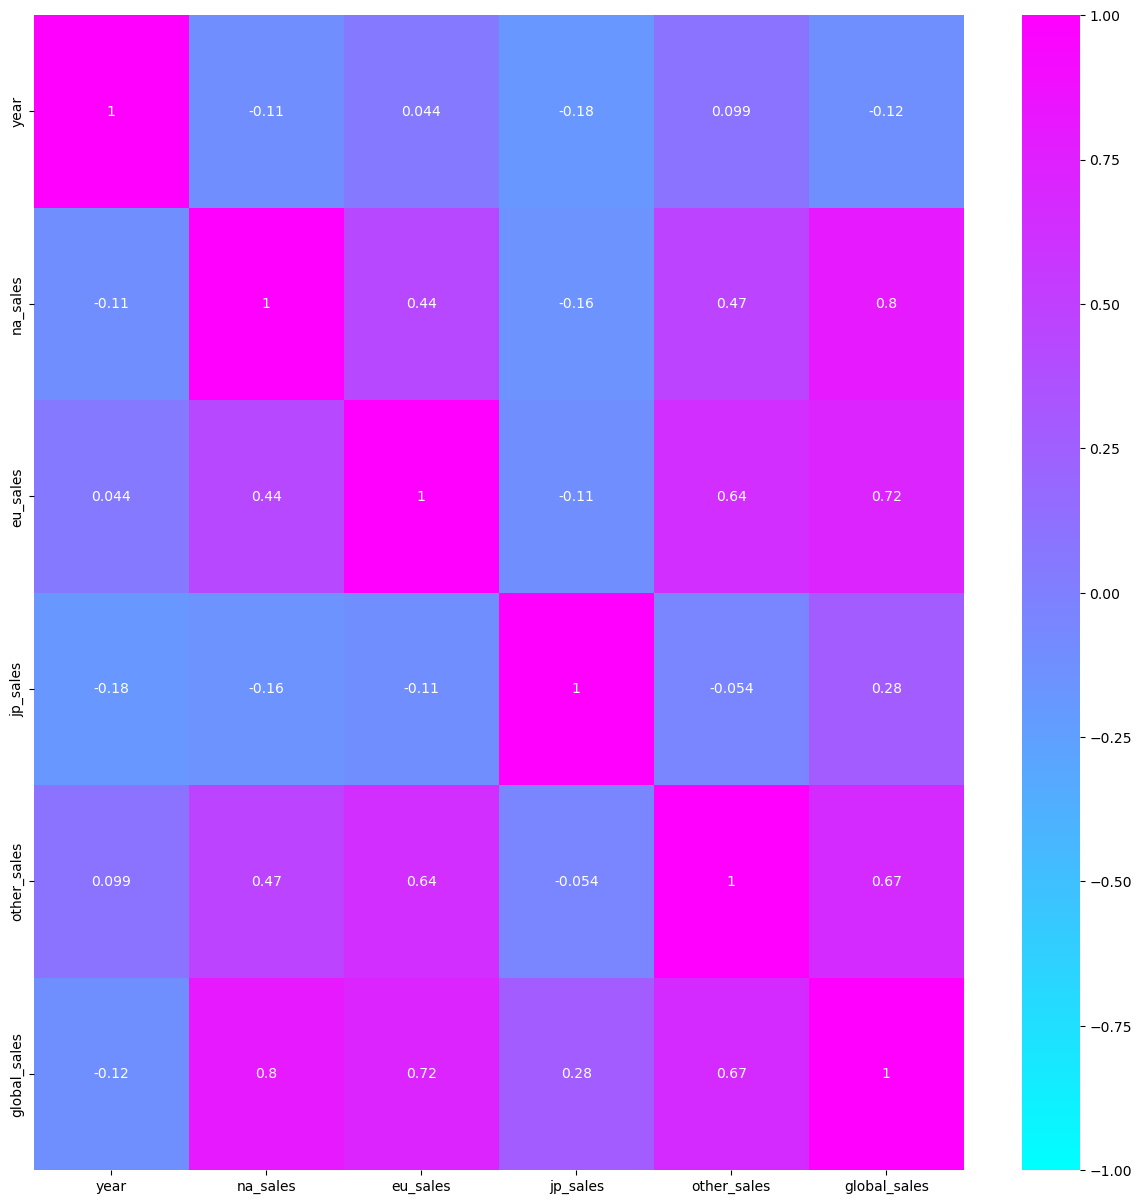

In [22]:
# Hartă de corelare
# Crearea figurii cu dimensiunea 15x15 inch
plt.figure(figsize=(15,15))
corr_games = games_df.corr()
# Crearea unui heatmap pentru matricea de corelații 'games_df'
sns.heatmap(
    data=corr_games,   # datele care vor fi afișate în heatmap
    vmin=-1,            # valoarea minimă a culorilor (pentru scală)
    vmax=1,             # valoarea maximă a culorilor (pentru scală)
    center=0,           # centrul culorilor la 0 (pozitive vs negative)
    annot=True,         # afișează valorile numerice în celule
    cmap='cool'         # paleta de culori folosită
)

# Afișarea graficului
plt.show()

In [23]:
# Filtrarea atributelor pentru a le găsi pe cele mai corelate cu Global_sales.
# Se utilizează valoarea absolută pentru a include atât corelațiile pozitive, cât și pe cele negative puternice.
abs(corr_games.global_sales)>0.5

year            False
na_sales         True
eu_sales         True
jp_sales        False
other_sales      True
global_sales     True
Name: global_sales, dtype: bool

In [24]:
# Afișarea celor mai influente atribute
print(games_df.corr().abs().nlargest(3, 'global_sales').index)

Index(['global_sales', 'na_sales', 'eu_sales'], dtype='object')


Variabilele cu cea mai mare predicție pentru `global_sales` sunt `na_sales` și `eu_sales`.

In [25]:
games_df_nemod=pd.read_csv("video_games_sales.csv")
games_df_nemod.genre.unique()

genre_df = games_df_nemod.genre
games_df['genre'] = genre_df
games_df.head()

# Selectarea coloanelor categorice pentru one-hot encoding
categorical_cols = ['genre']


from sklearn.preprocessing import OneHotEncoder

# Crearea encoder-ului
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' evită colinearitatea

# Aplicarea encoding-ului
encoded = encoder.fit_transform(games_df[categorical_cols])

# Obținerea de nume noi pentru coloane
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Crearea DataFrame-ului cu coloanele one-hot
df_encoded = pd.DataFrame(encoded, columns=encoded_cols, index=games_df.index)

# Eliminarea coloanelor originale și concatenarea celor one-hot
games_df_genre = pd.concat([games_df.drop(columns=categorical_cols), df_encoded], axis=1)

games_df_genre.head()



,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
1847,2009.0,0.53,0.40,0.00,0.17,1.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848,1981.0,1.03,0.06,0.00,0.01,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1849,2007.0,0.45,0.53,0.01,0.12,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1850,2015.0,0.52,0.33,0.17,0.08,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,1982.0,1.03,0.06,0.00,0.01,1.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
games_df_genre.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14465 entries, 1847 to 16597
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                14465 non-null  float64
 1   na_sales            14465 non-null  float64
 2   eu_sales            14465 non-null  float64
 3   jp_sales            14465 non-null  float64
 4   other_sales         14465 non-null  float64
 5   global_sales        14465 non-null  float64
 6   genre_Adventure     14465 non-null  float64
 7   genre_Fighting      14465 non-null  float64
 8   genre_Misc          14465 non-null  float64
 9   genre_Platform      14465 non-null  float64
 10  genre_Puzzle        14465 non-null  float64
 11  genre_Racing        14465 non-null  float64
 12  genre_Role-Playing  14465 non-null  float64
 13  genre_Shooter       14465 non-null  float64
 14  genre_Simulation    14465 non-null  float64
 15  genre_Sports        14465 non-null  float64
 16  genre_

# IV. Regresia liniară simplă

In [27]:
# Variabila țintă (valoarea locuinței)
y = games_df_genre['global_sales']
y.head()

1847    1.1
1848    1.1
1849    1.1
1850    1.1
1851    1.1
Name: global_sales, dtype: float64

In [28]:
# Variabila independentă
X1 = games_df_genre[['na_sales']]
X1.head()

,na_sales
1847,0.53
1848,1.03
1849,0.45
1850,0.52
1851,1.03


In [29]:
# Creare date de antrenare și de testare
from sklearn.model_selection import train_test_split

# Împărțirea datelor în set de antrenare și testare
X1_train, X1_test, y_train, y_test = train_test_split(
    X1, y, test_size=0.2, random_state=42)

print("Dimensiune set antrenare:", X1_train.shape, y_train.shape)
print("Dimensiune set test:", X1_test.shape, y_test.shape)

Dimensiune set antrenare: (11572, 1) (11572,)
Dimensiune set test: (2893, 1) (2893,)


In [30]:
from sklearn.linear_model import LinearRegression

# Crearea modelului
housing_model1 = LinearRegression()
# Antrenarea modelului pe datele de antrenare
housing_model1.fit(X1_train, y_train)

LinearRegression()

In [31]:
print("Coeficienți:", housing_model1.coef_) #coeficientul pentru variabila na_sales.
print("Intercept:", housing_model1.intercept_) #termenul liber din ecuația de regresie.

Coeficienți: [1.2846142]
Intercept: 0.08463649400444542


In [32]:
# Prezicerea valorilor pentru setul de test
price_pred1 = housing_model1.predict(X1_test)
r2_1 = housing_model1.score(X1_test, y_test)
print('R-square: %.4f' % r2_1 )

R-square: 0.6536


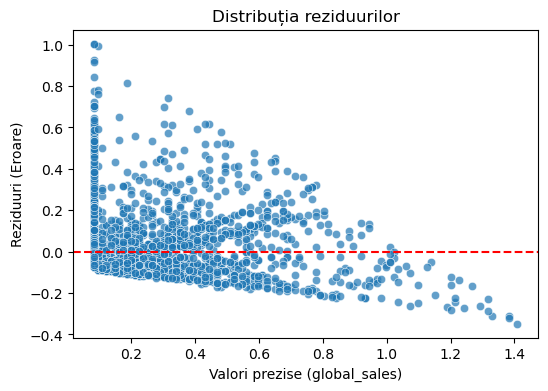

In [33]:
# Analizăarea reziduurilor (diferența dintre valori reale și predicții)
residuals = y_test - price_pred1

plt.figure(figsize=(6,4))
sns.scatterplot(x=price_pred1, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori prezise (global_sales)")
plt.ylabel("Reziduuri (Eroare)")
plt.title("Distribuția reziduurilor")
plt.show()


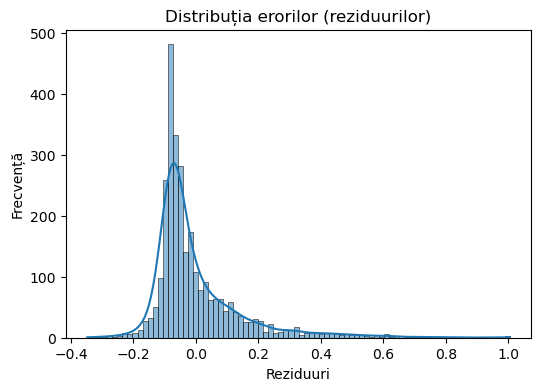

In [34]:
# Distribuția reziduurilor
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribuția erorilor (reziduurilor)")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()

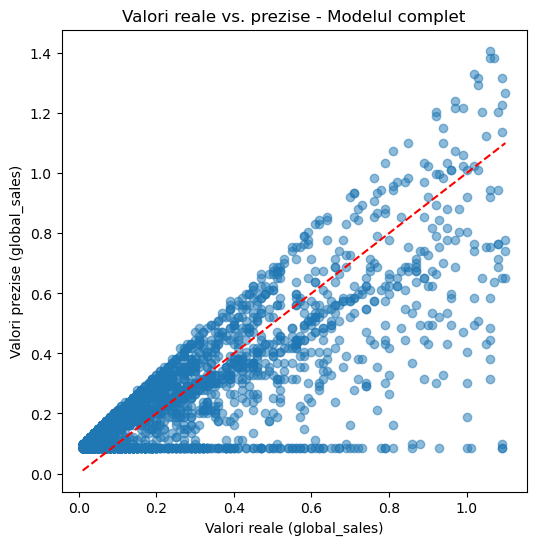

In [35]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, price_pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valori reale (global_sales)")
plt.ylabel("Valori prezise (global_sales)")
plt.title("Valori reale vs. prezise - Modelul complet")
plt.show()

In [36]:
# Evaluarea performanței modelului
from sklearn.metrics import mean_squared_error
import numpy as np

MSE1 = mean_squared_error( y_test, price_pred1)
print("MSE:", MSE1)

RMSE1 = np.sqrt(MSE1)
print("RMSE:", RMSE1)

MSE: 0.02168324494490177
RMSE: 0.14725231728194219


> Modelul de regresie liniară a obținut un $R^2$ de 0.6536, ceea ce înseamnă că explică aproximativ 65,36% din variația prețurilor locuințelor.
Eroarea medie pătratică (MSE = 0.021) și abaterea medie (RMSE = 0.14) arată că modelul greșește, în medie, cu aproximativ 0.14 de % față de valorile reale.
Rezultatele indică o performanță moderată, specifică unui model liniar simplu, iar o precizie mai bună ar putea fi obținută prin adăugarea altor variabile.

# V. Model cu două variabile: `GLOBAL_SALES ~ na_sales + eu_sales`



In [37]:
# Variabile independente
X2 = games_df_genre[['na_sales', 'eu_sales']]
X2.head()


,na_sales,eu_sales
1847,0.53,0.40
1848,1.03,0.06
1849,0.45,0.53
1850,0.52,0.33
1851,1.03,0.06


In [38]:
# Creare date de antrenare și de testare
# Împărțirea datelor în set de antrenare și testare
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.2, random_state=42)

print("Dimensiune set antrenare:", X2_train.shape, y_train.shape)
print("Dimensiune set test:", X2_test.shape, y_test.shape)

Dimensiune set antrenare: (11572, 2) (11572,)
Dimensiune set test: (2893, 2) (2893,)


In [39]:
# Crearea modelului
housing_model2 = LinearRegression()
# Antrenarea modelului pe datele de antrenare
housing_model2.fit(X2_train, y_train)

LinearRegression()

In [40]:
print("Coeficienți:", housing_model2.coef_) #coeficienții pentru variabilele LSTAT și RM.
print("Intercept:", housing_model2.intercept_) #termenul liber din ecuația de regresie.

Coeficienți: [0.96125929 1.14716128]
Intercept: 0.056433264550120876


In [41]:
# Prezicerea valorilor pentru setul de test
price_pred2 = housing_model2.predict(X2_test)
r2_2=housing_model2.score(X2_test, y_test)
print('R-square: %.4f' % r2_2)

R-square: 0.8072


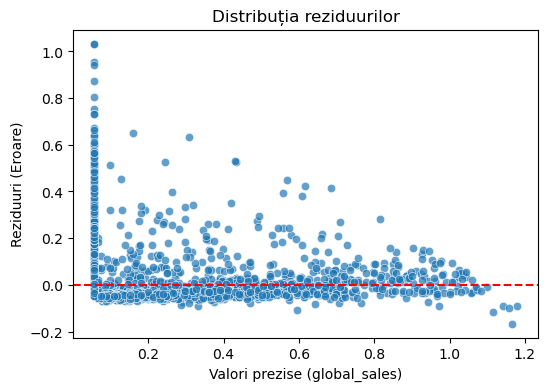

In [42]:
# Analizarea reziduurilor (diferența dintre valori reale și predicții)
residuals = y_test - price_pred2

plt.figure(figsize=(6,4))
sns.scatterplot(x=price_pred2, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori prezise (global_sales)")
plt.ylabel("Reziduuri (Eroare)")
plt.title("Distribuția reziduurilor")
plt.show()


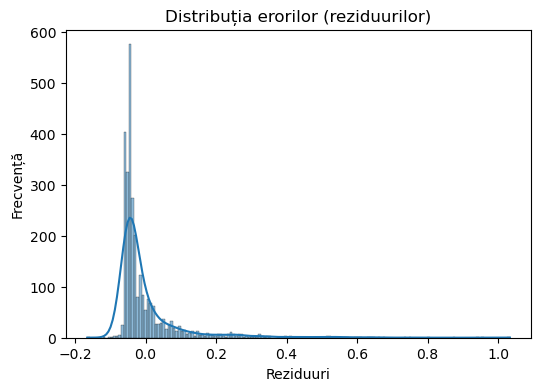

In [43]:
# Distribuția reziduurilor
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribuția erorilor (reziduurilor)")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()

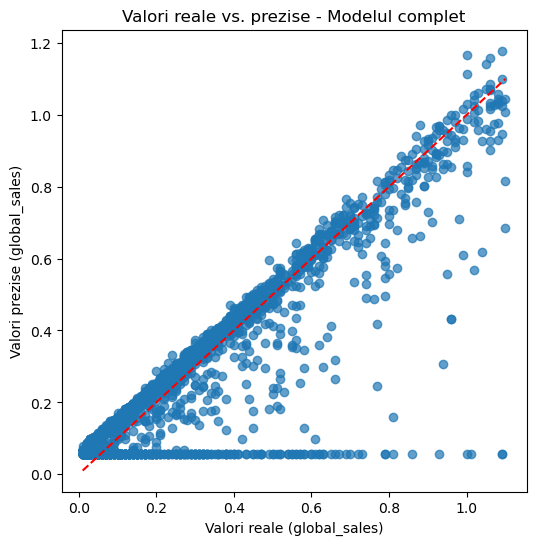

In [44]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, price_pred2, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valori reale (global_sales)")
plt.ylabel("Valori prezise (global_sales)")
plt.title("Valori reale vs. prezise - Modelul complet")
plt.show()

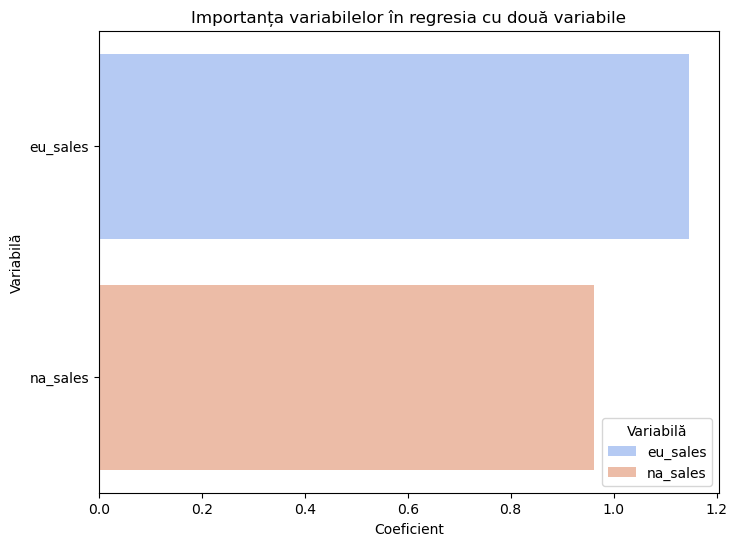

In [45]:
# Importanța variabilelor
coeff_df = pd.DataFrame({
    "Variabilă": X2.columns,
    "Coeficient":housing_model2.coef_
}).sort_values(by="Coeficient", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x="Coeficient",
    y="Variabilă",
    data=coeff_df,
    hue="Variabilă",         # Adaugă variabila pe axa Y și ca hue
    palette="coolwarm",
    dodge=False,             # Evită barele duplicate
    # legend=False             # Elimină legenda redundantă
)

plt.title("Importanța variabilelor în regresia cu două variabile")
plt.show()

In [46]:
# Evaluarea performanțelor modelului
from sklearn.metrics import mean_squared_error
import numpy as np

MSE2 = mean_squared_error( y_test, price_pred2)
print("MSE:", MSE2)

RMSE2 = np.sqrt(MSE2)
print("RMSE:", RMSE2)

MSE: 0.012071740458128817
RMSE: 0.10987147244907941


> Modelul de regresie liniară cu două variabile a obținut un coeficient $R^2$ de 0.8072, ceea ce indică faptul că aproximativ 70% din variația prețurilor locuințelor este explicată de variabilele incluse.
Eroarea medie pătratică (MSE) are valoarea 0.0120, iar abaterea medie (RMSE) este0.1098.
Aceste valori arată că modelul are o performanță bună, cu o abatere medie de aproximativ 0.1098 față de prețurile reale, ceea ce indică o precizie semnificativ mai bună față de modelul anterior.

### Model complet: toate variabilele din setul de date


In [47]:
X3 = games_df_genre.drop("global_sales", axis=1)
X3.head()

,year,na_sales,eu_sales,jp_sales,other_sales,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
1847,2009.0,0.53,0.40,0.00,0.17,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848,1981.0,1.03,0.06,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1849,2007.0,0.45,0.53,0.01,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1850,2015.0,0.52,0.33,0.17,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,1982.0,1.03,0.06,0.00,0.01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Creare date de antrenare și de testare
# Împărțirea datelor în set de antrenare și testare
X3_train, X3_test, y_train, y_test = train_test_split(
    X3, y, test_size=0.2, random_state=42)

print("Dimensiune set antrenare:", X3_train.shape, y_train.shape)
print("Dimensiune set test:", X3_test.shape, y_test.shape)

Dimensiune set antrenare: (11572, 16) (11572,)
Dimensiune set test: (2893, 16) (2893,)


In [49]:
# Crearea modelului
housing_model3 = LinearRegression()
# Antrenarea modelului pe datele de antrenare
housing_model3.fit(X3_train, y_train)

LinearRegression()

In [50]:
print("Coeficienți:", housing_model3.coef_) #coeficienții variabolelor 
print("Intercept:", housing_model3.intercept_) #termenul liber din ecuația de regresie.

Coeficienți: [-1.49641280e-05  9.98358007e-01  1.00126094e+00  9.98281842e-01
  9.92944386e-01 -4.22581369e-04 -5.99259003e-04 -1.23293475e-04
 -8.66244892e-05  4.30329569e-04 -6.91588027e-05 -3.35931481e-04
 -6.61150822e-06 -4.74106459e-05 -1.21502403e-04 -1.78286919e-05]
Intercept: 0.030781513550434902


In [51]:
# Prezicerea valorilor pentru setul de test
price_pred3 = housing_model3.predict(X3_test)
r2_3=housing_model3.score(X3_test, y_test)
print('R-square: %.4f' % r2_3 )

R-square: 0.9996


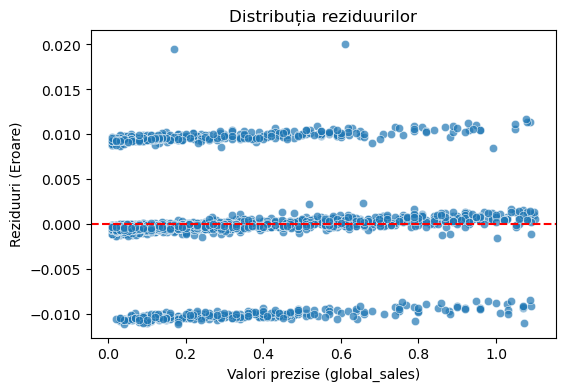

In [52]:
# Analizarea reziduurilor (diferența dintre valori reale și predicții)
residuals = y_test - price_pred3

plt.figure(figsize=(6,4))
sns.scatterplot(x=price_pred3, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valori prezise (global_sales)")
plt.ylabel("Reziduuri (Eroare)")
plt.title("Distribuția reziduurilor")
plt.show()

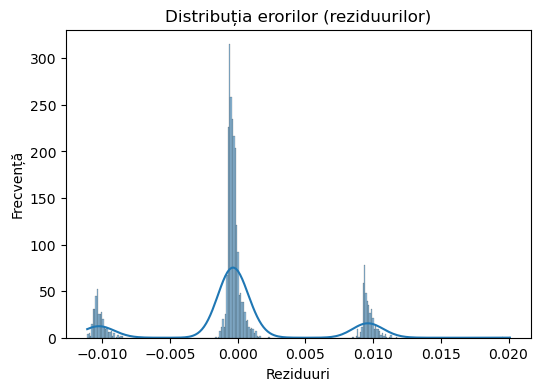

In [53]:
# Distribuția reziduurilor
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribuția erorilor (reziduurilor)")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()


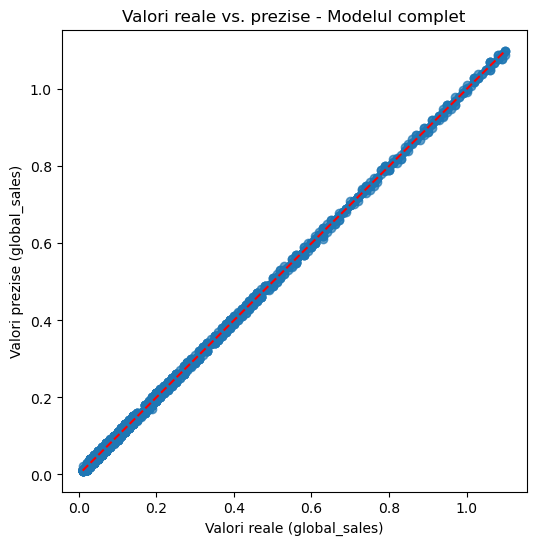

In [54]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, price_pred3, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valori reale (global_sales)")
plt.ylabel("Valori prezise (global_sales)")
plt.title("Valori reale vs. prezise - Modelul complet")
plt.show()

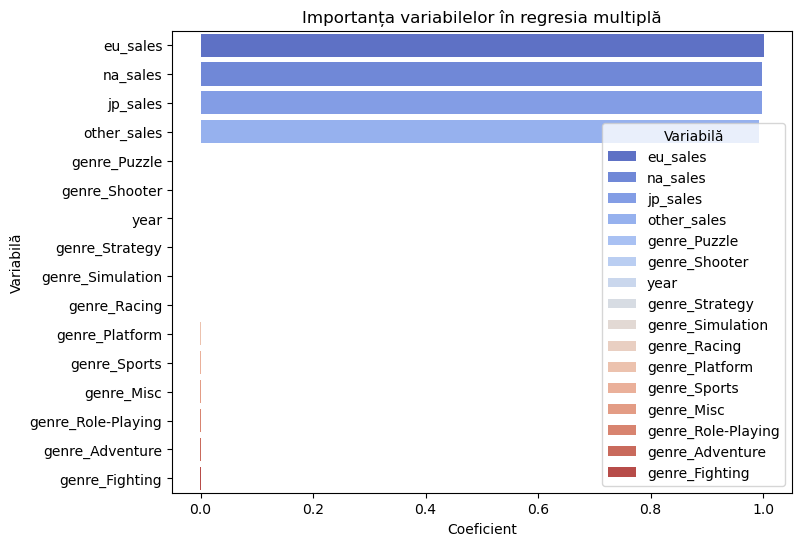

In [55]:
# Importanța variabilelor
coeff_df = pd.DataFrame({
    "Variabilă": X3.columns,
    "Coeficient":housing_model3.coef_
}).sort_values(by="Coeficient", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(
    x="Coeficient",
    y="Variabilă",
    data=coeff_df,
    hue="Variabilă",         # Adaugă variabila pe axa Y și ca hue
    palette="coolwarm",
    dodge=False,             # Evită barele duplicate
    # legend=False             # Elimină legenda redundantă
)

plt.title("Importanța variabilelor în regresia multiplă")
plt.show()


In [56]:
# Evaluarea performanței modelului

MSE3 = mean_squared_error( y_test, price_pred3)
print("MSE:", MSE3)

RMSE3 = np.sqrt(MSE3)
print("RMSE:", RMSE3)

MSE: 2.7121728701642478e-05
RMSE: 0.005207852599838294


> Modelul de regresie liniară cu toate variabilele din setul de date a obținut un coeficient de determinare $R^2$ de 0.9996, ceea ce indică faptul că aproximativ 96% din variația prețului mediu al locuințelor este explicată de variabilele folosite.
Valoarea MSE este 2.712, iar RMSE este 0.005, ceea ce arată că modelul prezice valorile global_sales cu o abatere medie de aproximativ 2.700 de dolari.
Aceste rezultate indică o performanță foarte bună, modelul fiind capabil să ofere estimări precise ale prețului locuințelor.

# VI. Concluzii

In [57]:
# Compararea modelelor 
results = pd.DataFrame({
    "Model": ["na_sales", "na_sales + eu_sales", "Toate variabilele"],
    "R²": [r2_1, r2_2, r2_3],
    "RMSE": [RMSE1, RMSE2, RMSE3]
})
print("\nComparație modele:\n", results)



Comparație modele:
                  Model        R²      RMSE
0             na_sales  0.653623  0.147252
1  na_sales + eu_sales  0.807161  0.109871
2    Toate variabilele  0.999567  0.005208


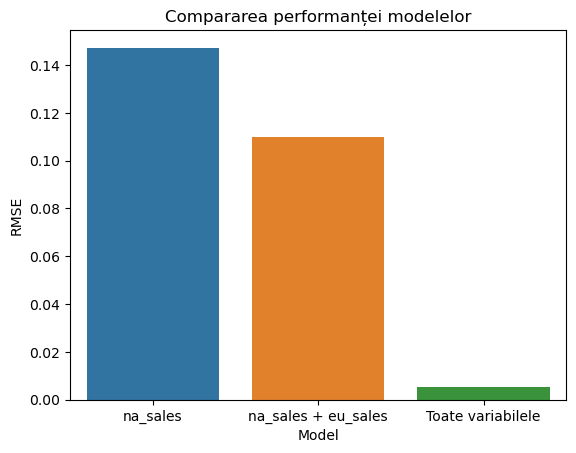

In [58]:
# Vizualizare RMSE 
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("Compararea performanței modelelor")
plt.show()

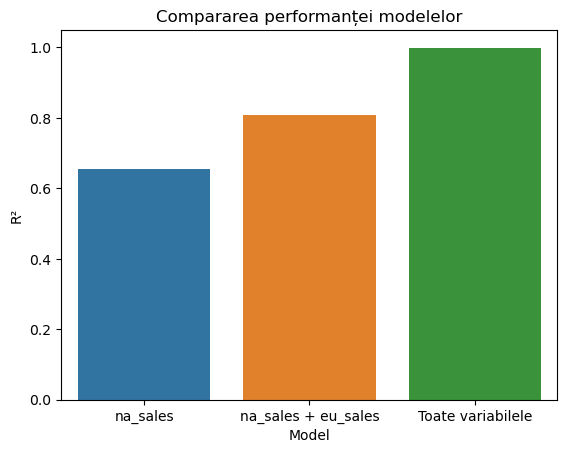

In [59]:
# Vizualizare R² 
sns.barplot(x="Model", y="R²", data=results)
plt.title("Compararea performanței modelelor")
plt.show()

 ## Interpretarea rezultatelor

 * Observăm că pe măsură ce adăugăm mai multe variabile, **R² crește** — modelul explică mai mult din variația prețului locuințelor.
 * Totuși, trebuie să fim atenți: un R² mare nu înseamnă întotdeauna un model mai bun (pot apărea variabile irelevante).
 * În practică, adăugarea treptată a caracteristicilor ajută la înțelegerea relațiilor dintre factori și preț.

